In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [13]:
def loadCsv(): 
    data = pd.read_csv("../map.csv", names=['source', 'dest', 'weight'],usecols=[0, 1, 5])

    allPueblos = []
    for i in data['source']:
        if i not in allPueblos and i is not np.nan:
            allPueblos.append(i)
    
        for i in data['dest']:
            if i not in allPueblos and i is not np.nan:
                allPueblos.append(i)
    
    N = len(allPueblos)
    #counter = 0

    amap = np.zeros((N,N))
    for i in range(0, N):
        for j in range(0, N):
            src = allPueblos[i]
            dest = allPueblos[j]
            if(src!=dest):
                value = data.loc[(data['source']==src) & (data['dest']==dest)]['weight'].values
                if(len(value)>0):
                    #counter += 1
                    amap [i][j] = amap[i][j] = value[0]
    #print(counter)
    return amap

943


array([[0.  , 0.46, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 6.95, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [16]:
grid = loadCsv()

# start point and goal

start = (0,0)
goal = (66,66)

943


In [17]:
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [23]:
def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    pathcost = 0

    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return False

route = astar(grid, start, goal)
route = route + [start]
route = route[::-1]
print(route)

TypeError: unsupported operand type(s) for +: 'bool' and 'list'

In [22]:
pathcost = 0
for i in route:
     x = i[0]
     y = i[1]
     pathcost += grid[x][y]
     #print(pathcost)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


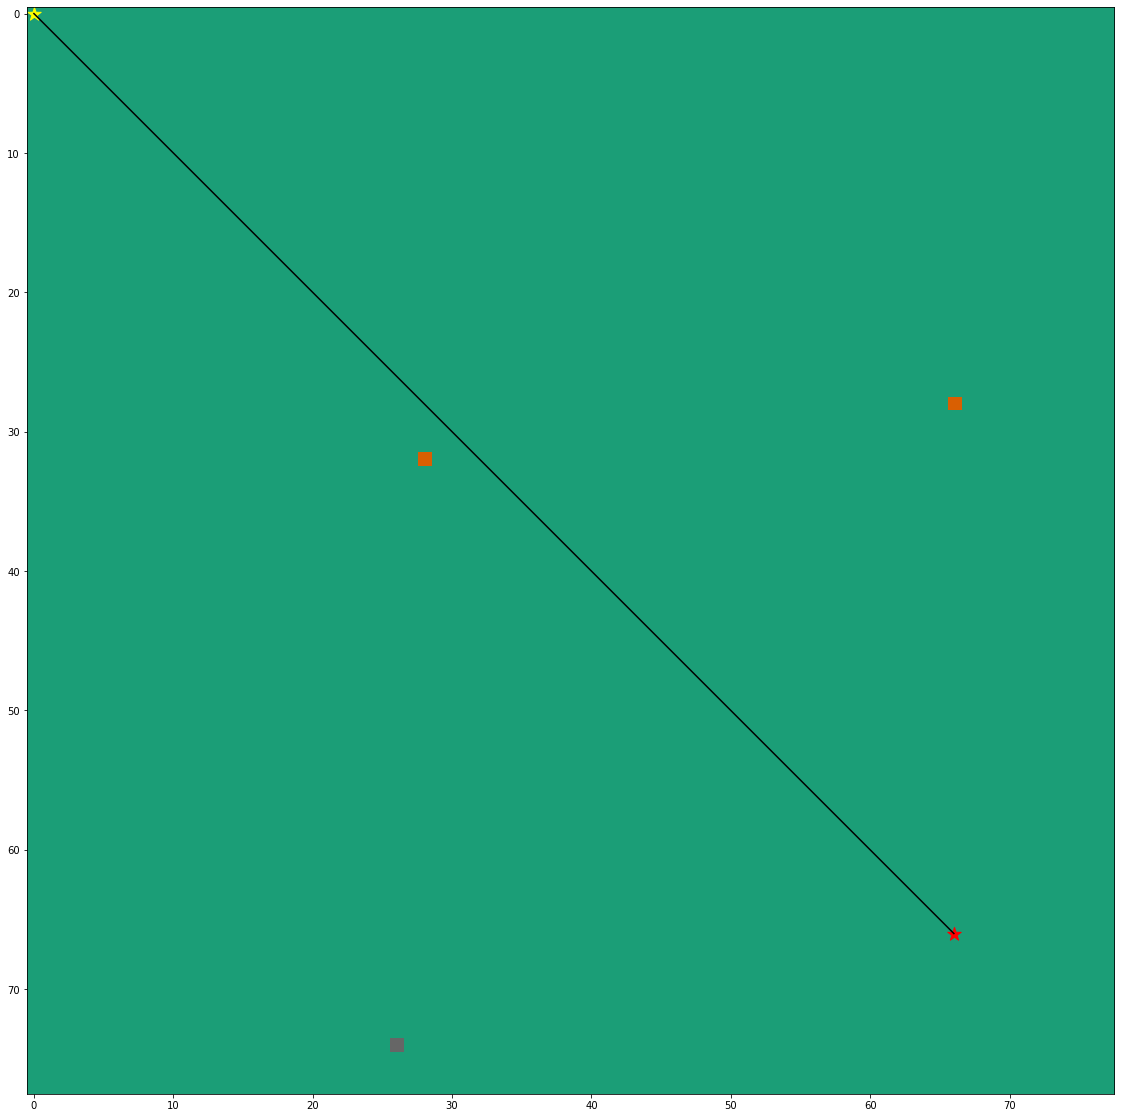

In [19]:
x_coords = []
y_coords = []
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)
ax.plot(y_coords,x_coords, color = "black")
plt.show()